In [1]:
#Checking directory, placed data in that directory. 
import os 

directory = os.getcwd()

print(directory)

C:\Users\Miguel


In [2]:
#importing all needed libraries. 
import pandas as pd
import numpy as np
import warnings 

from keras.layers import  Input,Dense,Conv2D,MaxPooling2D,UpSampling2D,Reshape, Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn import metrics
from scipy import interp
from tensorflow.keras.optimizers import SGD
from functools import partial
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential, Model
from keras import optimizers
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import f1_score,confusion_matrix
import shap
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from itertools import chain

In [3]:
#Silencing warnings. 
warnings.filterwarnings('ignore')


In [4]:
#import data. 
data = pd.read_csv("Transposed_Postive_Regulation_Apoptosis.csv")

In [7]:
#Prepare apoptosis data. 
x_frame = data.iloc[: , :-1]

y_frame = data.iloc[:,-1:]

le = preprocessing.LabelEncoder()
oe = OrdinalEncoder()

x_frame = oe.fit_transform(x_frame)

y_frame = le.fit_transform(y_frame)
x_train, x_test, y_train, y_test = train_test_split(x_frame, y_frame, test_size=0.5, random_state=1)

print(x_train)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape, y_train.shape)
print(x_train.shape, y_train.shape)

[[136.  25.   1. ...  52. 120.  87.]
 [ 65.  89.   0. ... 148.  12.  24.]
 [ 67.  88.   0. ...  79.  52.  83.]
 ...
 [ 71.  84.   0. ... 152.   8.  76.]
 [110.  50.   1. ...   8.  19.  35.]
 [ 78.  80.   1. ... 161.  53.  42.]]
(81,)
(82, 306)
(82,)
(81, 306) (81,)
(81, 306) (81,)


In [8]:
#conv1d model 
def cnnmodel(optimizer ='Adam',learn_rate=0.01):
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(1, 1, activation='relu',padding='same', input_shape=(306,1)))

    cnnmodel.add(Conv1D(1, 1, activation='relu'))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(1, activation='sigmoid'))

    cnnmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
   
    return cnnmodel 
#model.summary()

In [9]:
#conv1d model parameter optimization. 
cnnmodel = KerasClassifier(build_fn=cnnmodel, verbose=0)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]

param_grid = dict(batch_size=batch_size, epochs=epochs,optimizer=optimizer,learn_rate=learn_rate)

grid = GridSearchCV(estimator=cnnmodel, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.839506 using {'batch_size': 10, 'epochs': 50, 'learn_rate': 0.2, 'optimizer': 'Adagrad'}
0.802469 (0.092387) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'SGD'}
0.802469 (0.092387) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'RMSprop'}
0.802469 (0.092387) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Adagrad'}
0.802469 (0.092387) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Adadelta'}
0.728395 (0.097210) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Adam'}
0.716049 (0.017459) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Adamax'}
0.740741 (0.138580) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Nadam'}
0.802469 (0.092387) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.01, 'optimizer': 'SGD'}
0.802469 (0.092387) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.01, 'optim

Epoch 1/50
7/7 [==============================] - 0s 14ms/step - loss: 0.5470 - accuracy: 0.7656 - val_loss: 0.3643 - val_accuracy: 0.9412
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5467 - accuracy: 0.7656 - val_loss: 0.3605 - val_accuracy: 0.9412
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5465 - accuracy: 0.7656 - val_loss: 0.3587 - val_accuracy: 0.9412
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7656 - val_loss: 0.3573 - val_accuracy: 0.9412
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7656 - val_loss: 0.3554 - val_accuracy: 0.9412
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7656 - val_loss: 0.3537 - val_accuracy: 0.9412
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5462 - accuracy: 0.7656 - val_loss: 0.3524 - val_accuracy: 0.9412
Epoch 8/50
7/7 [=================

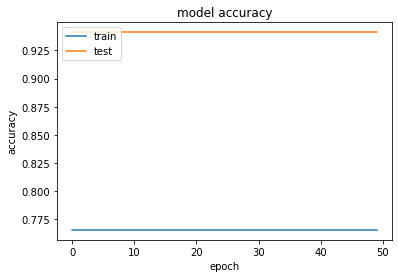

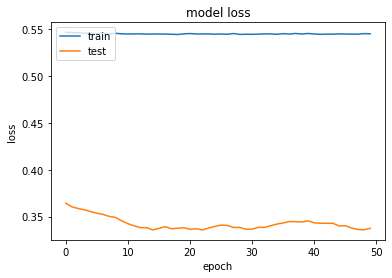

In [38]:
#plot loss and history. 
history = cnnmodel.fit(x_train, y_train, epochs=50, batch_size=10, validation_split=0.2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
#best conv1d model for apoptosis data. 
cnnmodel = Sequential()
cnnmodel.add(Conv1D(1, 1, activation='relu',padding='same', input_shape=(306,1)))

cnnmodel.add(Conv1D(1, 1, activation='relu'))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(1, activation='sigmoid'))

cnnmodel.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01, name="RMSprop"), metrics=['accuracy'])
cnnmodel.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 306, 1)            2         
                                                                 
 conv1d_17 (Conv1D)          (None, 306, 1)            2         
                                                                 
 flatten_8 (Flatten)         (None, 306)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 307       
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [43]:
#fit conv1d model to apoptosis data. 

cnnmodel.fit(x_train,y_train,epochs=50, batch_size=10)


Epoch 1/50
9/9 [==============================] - 0s 750us/step - loss: 0.6731 - accuracy: 0.7037
Epoch 2/50
9/9 [==============================] - 0s 750us/step - loss: 0.6409 - accuracy: 0.8025
Epoch 3/50
9/9 [==============================] - 0s 625us/step - loss: 0.6197 - accuracy: 0.8025
Epoch 4/50
9/9 [==============================] - 0s 750us/step - loss: 0.6023 - accuracy: 0.8025
Epoch 5/50
9/9 [==============================] - 0s 625us/step - loss: 0.5867 - accuracy: 0.8025
Epoch 6/50
9/9 [==============================] - 0s 625us/step - loss: 0.5732 - accuracy: 0.8025
Epoch 7/50
9/9 [==============================] - 0s 625us/step - loss: 0.5670 - accuracy: 0.8025
Epoch 8/50
9/9 [==============================] - 0s 625us/step - loss: 0.5566 - accuracy: 0.8025
Epoch 9/50
9/9 [==============================] - 0s 625us/step - loss: 0.5473 - accuracy: 0.8025
Epoch 10/50
9/9 [==============================] - 0s 625us/step - loss: 0.5437 - accuracy: 0.8025
Epoch 11/50
9/9 [==

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.9066666666666667
[1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1]
<class 'numpy.ndarray'>


[]

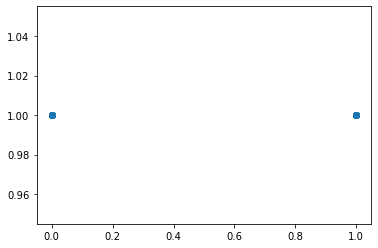

In [44]:
#predict values using test data. 
predictions = cnnmodel.predict(x_test)
test_predictions = []
for l in predictions: 
    for item in l:
        test_predictions.append(item)
test_predictions = np.array(test_predictions)
test_predictions = np.round(test_predictions)

print(test_predictions)
f1score=f1_score(test_predictions,y_test)

print(f1score)
print(y_test)
print(type(y_test))

plt.scatter(y_test, test_predictions)
plt.plot()

In [45]:
#confusion matrix of values. 
confusion_matrix(y_test, test_predictions)


array([[ 0, 14],
       [ 0, 68]], dtype=int64)

In [46]:
#prepare transport gene data. 
data2 =  pd.read_csv("Transposed_transport_genes.csv")
x_frame2 = data2.iloc[: , :-1]


y_frame2 = data2.iloc[:,-1:]
x_frame2 = oe.fit_transform(x_frame2)

y_frame2 = le.fit_transform(y_frame2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_frame2,y_frame2)

print(x_train2)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

[[ 37.  31.   0. ...  29.  35.  25.]
 [  8. 137.   1. ...  37.  18. 123.]
 [ 28.  65.   0. ...  70.  22. 104.]
 ...
 [ 35.  36.   1. ... 125.  54.  84.]
 [ 33.  42.   1. ... 122.  49. 125.]
 [ 18. 106.   1. ...  72.  44. 105.]]
(122,)
(41, 355)
(41,)


In [16]:
#conv1d transport gene model. 
def cnnmodel2(optimizer ='Adam',learn_rate=0.01):
    cnnmodel2 = Sequential()
    cnnmodel2.add(Conv1D(1, 1, activation='relu',padding='same', input_shape=(355,1)))

    cnnmodel2.add(Conv1D(1, 1, activation='relu'))
    cnnmodel2.add(Flatten())
    cnnmodel2.add(Dense(1, activation='sigmoid'))

    cnnmodel2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cnnmodel2

In [17]:
#parameter optimization. 
cnnmodel2 = KerasClassifier(build_fn=cnnmodel2, verbose=0)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]

param_grid = dict(batch_size=batch_size, epochs=epochs,optimizer=optimizer,learn_rate=learn_rate)

grid = GridSearchCV(estimator=cnnmodel2, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train2, y_train2)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.868699 using {'batch_size': 20, 'epochs': 10, 'learn_rate': 0.1, 'optimizer': 'SGD'}
0.843902 (0.032602) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'SGD'}
0.852033 (0.036793) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'RMSprop'}
0.827033 (0.072148) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Adagrad'}
0.761992 (0.102951) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Adadelta'}
0.852033 (0.036793) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Adam'}
0.835772 (0.032193) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Adamax'}
0.852033 (0.036793) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Nadam'}
0.803252 (0.059788) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.01, 'optimizer': 'SGD'}
0.786992 (0.080187) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.01, 'optimizer

Epoch 1/10
5/5 [==============================] - 0s 22ms/step - loss: 0.4144 - accuracy: 0.8557 - val_loss: 0.4397 - val_accuracy: 0.8400
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4143 - accuracy: 0.8557 - val_loss: 0.4397 - val_accuracy: 0.8400
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.4140 - accuracy: 0.8557 - val_loss: 0.4397 - val_accuracy: 0.8400
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4139 - accuracy: 0.8557 - val_loss: 0.4397 - val_accuracy: 0.8400
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4138 - accuracy: 0.8557 - val_loss: 0.4397 - val_accuracy: 0.8400
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4136 - accuracy: 0.8557 - val_loss: 0.4397 - val_accuracy: 0.8400
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4137 - accuracy: 0.8557 - val_loss: 0.4397 - val_accuracy: 0.8400
Epoch 8/10
5/5 [=================

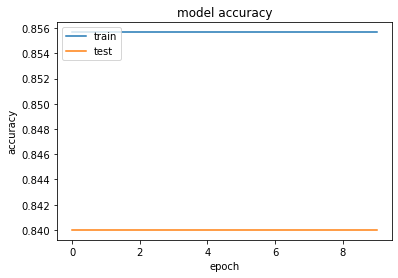

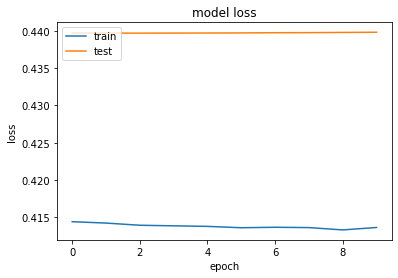

In [34]:
#plot loss and accuracy. 
history = cnnmodel2.fit(x_train2, y_train2, epochs=10, batch_size=20, validation_split=0.2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
#best conv1d model for transport data. 
cnnmodel2 = Sequential()
cnnmodel2.add(Conv1D(1, 1, activation='relu',padding='same', input_shape=(355,1)))

cnnmodel2.add(Conv1D(1, 1, activation='relu'))
cnnmodel2.add(Flatten())
cnnmodel2.add(Dense(1, activation='sigmoid'))

cnnmodel2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, name="SGD"), metrics=['accuracy'])
cnnmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 306, 1)            2         
                                                                 
 conv1d_5 (Conv1D)           (None, 306, 1)            2         
                                                                 
 flatten_2 (Flatten)         (None, 306)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 307       
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [35]:
#fit the model for transport data. 
cnnmodel2.fit(x_train2,y_train2,epochs=10, batch_size=20)

Epoch 1/10
7/7 [==============================] - 0s 667us/step - loss: 0.4190 - accuracy: 0.8525
Epoch 2/10
7/7 [==============================] - 0s 667us/step - loss: 0.4188 - accuracy: 0.8525
Epoch 3/10
7/7 [==============================] - 0s 667us/step - loss: 0.4188 - accuracy: 0.8525
Epoch 4/10
7/7 [==============================] - 0s 834us/step - loss: 0.4187 - accuracy: 0.8525
Epoch 5/10
7/7 [==============================] - 0s 834us/step - loss: 0.4189 - accuracy: 0.8525
Epoch 6/10
7/7 [==============================] - 0s 667us/step - loss: 0.4187 - accuracy: 0.8525
Epoch 7/10
7/7 [==============================] - 0s 834us/step - loss: 0.4188 - accuracy: 0.8525
Epoch 8/10
7/7 [==============================] - 0s 833us/step - loss: 0.4191 - accuracy: 0.8525
Epoch 9/10
7/7 [==============================] - 0s 834us/step - loss: 0.4190 - accuracy: 0.8525
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 0.4191 - accuracy: 0.8525


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.8285714285714285
[1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1]
<class 'numpy.ndarray'>


[]

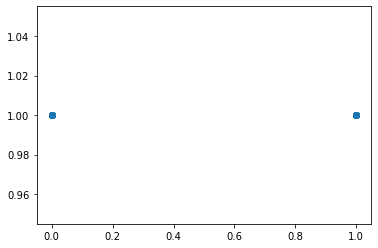

In [36]:
#make predictions using test data. 
predictions2 = cnnmodel2.predict(x_test2)
test_predictions2 = []
for l in predictions2: 
    for item in l:
        test_predictions2.append(item)
test_predictions2 = np.array(test_predictions2)

test_predictions2 = np.round(test_predictions2)

print(test_predictions2)
f1score=f1_score(test_predictions2,y_test2)

print(f1score)
print(y_test2)
print(type(y_test2))

plt.scatter(y_test2, test_predictions2)
plt.plot()

In [37]:
#confusion matrix. 
confusion_matrix(y_test2, test_predictions2)

array([[ 0, 12],
       [ 0, 29]], dtype=int64)

In [ ]:
#Models seem to be overfitting.